# Data Cleaning

## Data Creation

### Import data from Kaggle

In [71]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"haniffzaid","key":"b6bef920307a4072855c71d6e9b31b17"}'}

In [72]:
import os
import json

# Create the .kaggle directory
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the kaggle.json file to the .kaggle directory
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')


In [73]:
!pip install kaggle


In [74]:
!kaggle datasets download -d dragonduck/property-listings-in-kuala-lumpur


Dataset URL: https://www.kaggle.com/datasets/dragonduck/property-listings-in-kuala-lumpur
License(s): CC0-1.0
property-listings-in-kuala-lumpur.zip: Skipping, found more recently modified local copy (use --force to force download)


### Unzip the dataset

In [75]:
import zipfile

with zipfile.ZipFile('/content/property-listings-in-kuala-lumpur.zip', 'r') as zip_ref:
    zip_ref.extractall('data_kaggle_konoha')


### Load the data into Notebook

In [76]:
import numpy as np
np.random.seed(101)
import requests
import time
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import re
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing
import sklearn.metrics
import keras.models
import keras.layers

properties = pd.read_csv('/content/data_kaggle_konoha/data_kaggle.csv')

In [77]:
# Display the dataframe
properties.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


# Data Preprocessing

In [78]:
# Check missing values

properties.isnull().sum()

,0
Location,0
Price,248
Rooms,1706
Bathrooms,2013
Car Parks,17567
Property Type,25
Size,1063
Furnishing,6930


In [79]:
# Drop missing values

properties.dropna(inplace=True)

## Data Preprocessing (Size)

In [80]:
# View Size column

properties['Size'].head()

,Size
0,"Built-up : 1,335 sq. ft."
2,"Built-up : 1,875 sq. ft."
4,"Built-up : 1,513 sq. ft."
5,Land area : 7200 sq. ft.
7,Land area : 3600 sq. ft.


In [81]:
# Select only the numerical value in Size column

import pandas as pd
import re

def extract_number(size_str):
    # Handle cases where size_str is not a string
    if not isinstance(size_str, str):
        return None

    match = re.search(r'\d+', size_str.replace(',', ''))
    return int(match.group()) if match else None

properties['Size'] = properties['Size'].apply(extract_number)

## Data Preprocessing (Price)

In [82]:
# Strip the price of the "RM" as well as commas
def strip_price(text):
    text = text.replace("RM", "")
    text = text.replace(",", "")
    text = text.strip()
    return int(text)

properties["Price"] = properties["Price"].apply(strip_price)

## Data Preprocessing (Location)

In [83]:
# Strip the Kuala Lumpur in Location

def strip_location(text):
    text = text.replace("Kuala Lumpur", "")
    text = text.replace(",", "")
    text = text.strip()
    return text # Return the cleaned text, not an integer

properties["Location"] = properties["Location"].apply(strip_location)

## Data Preprocessing (Property Type)

In [84]:
# Standardize the type in Property Type

def strip_ptype(text):
    text = text.replace("Corner", "")
    text = text.replace("EndLot", "")
    text = text.replace("Intermediate", "")
    text = text.replace("Duplex", "")
    text = text.replace("Triplex", "")
    text = text.replace("Studio", "")
    text = text.replace("SOHO", "")
    text = text.replace("Penthouse", "")
    text = text.replace("()", "")
    text = text.strip()
    return text # Return the cleaned text, not an integer

properties["Property Type"] = properties["Property Type"].apply(strip_ptype)

In [85]:
properties

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,KLCC,1250000,2+1,3.0,2.0,Serviced Residence,1335.0,Fully Furnished
2,Dutamas,1030000,3,4.0,2.0,Condominium,1875.0,Partly Furnished
4,Bukit Jalil,900000,4+1,3.0,2.0,Condominium,1513.0,Partly Furnished
5,Taman Tun Dr Ismail,5350000,4+2,5.0,4.0,Bungalow,7200.0,Partly Furnished
7,Taman Tun Dr Ismail,2600000,5,4.0,4.0,Semi-detached House,3600.0,Partly Furnished
...,...,...,...,...,...,...,...,...
53862,Seputeh,750000,3,2.0,1.0,Condominium,915.0,Partly Furnished
53868,KL Sentral,1400000,3+1,3.0,2.0,Condominium,1544.0,Fully Furnished
53869,KL Eco City,880000,1,1.0,1.0,Condominium,650.0,Partly Furnished
53876,Sri Hartamas,2700000,4+2,6.0,3.0,Condominium,3973.0,Partly Furnished


In [86]:
sorted(properties["Property Type"].unique())

['1-sty Terrace/Link House',
 '1.5-sty Terrace/Link House',
 '2-sty Terrace/Link House',
 '2.5-sty Terrace/Link House',
 '3-sty Terrace/Link House',
 '3.5-sty Terrace/Link House',
 '4-sty Terrace/Link House',
 '4.5-sty Terrace/Link House',
 'Apartment',
 'Bungalow',
 'Bungalow Land',
 'Cluster House',
 'Condominium',
 'Flat',
 'Residential Land',
 'Semi-detached House',
 'Serviced Residence',
 'Townhouse']

In [87]:
# Drop missing values

properties.dropna(inplace=True)

In [88]:
# Check missing values again

properties.isnull().sum()

,0
Location,0
Price,0
Rooms,0
Bathrooms,0
Car Parks,0
Property Type,0
Size,0
Furnishing,0


In [89]:
# Display summary statistics

properties.describe()

,Price,Bathrooms,Car Parks,Size
count,3.186000e+04,31860.000000,31860.000000,31860.000000
mean,1.581286e+06,2.935907,2.013371,2002.310672
std,2.248932e+06,1.532812,1.308814,9492.211268
min,3.080000e+02,1.000000,1.000000,0.000000
25%,5.600000e+05,2.000000,1.000000,920.000000
50%,9.000000e+05,2.000000,2.000000,1230.000000
75%,1.700000e+06,4.000000,2.000000,1870.000000
max,1.300000e+08,20.000000,30.000000,820000.000000


Text(0.5, 1.0, 'Property Type Distribution')

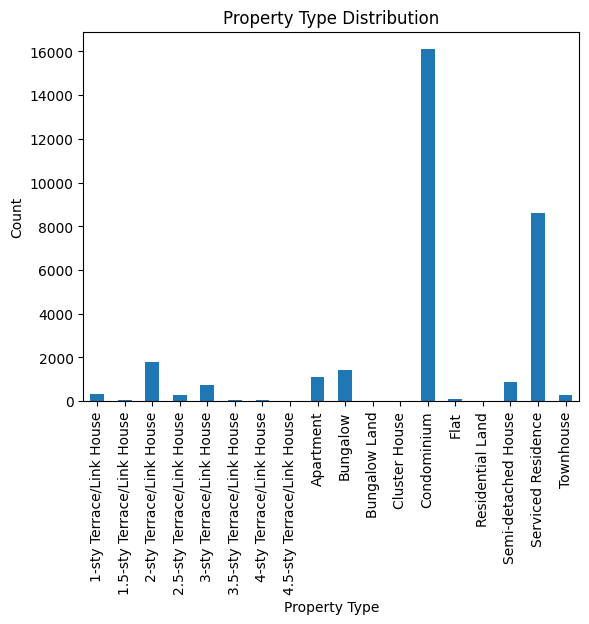

In [92]:
# Check data balance

plt = properties.groupby('Property Type').size().plot(kind='bar')
plt.set_xlabel('Property Type')
plt.set_ylabel('Count')
plt.set_title('Property Type Distribution')